In [1]:
import neurolab as nl
import matplotlib.pyplot as plt

In [2]:
#perceptron temelli sınıflandırıcı

In [3]:
input = [[0,0], [0,1], [1,0], [1,1]]
target = [[0], [0], [0], [1]]

In [4]:
net = nl.net.newp([[0,1], [0,1]], 1)

In [5]:
error_progress = net.train(input, target, epochs = 100, show = 10, lr = 0.1) #Delta Kuralı

The goal of learning is reached


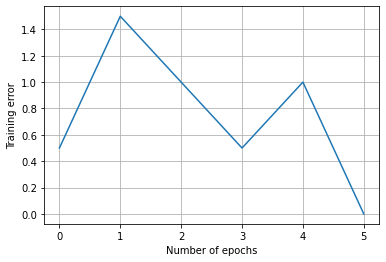

In [6]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.grid()
plt.show()

In [ ]:
#Tek katmanlı sinir ağları

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [9]:
input_data = np.loadtxt(r'C:\Users\ITU\data\neural_simple.txt', delimiter = ',')
input_data

array([[2. , 4. , 0. , 0. ],
       [1.5, 3.9, 0. , 0. ],
       [2.2, 4.1, 0. , 0. ],
       [1.9, 4.7, 0. , 0. ],
       [5.4, 2.2, 0. , 1. ],
       [4.3, 7.1, 0. , 1. ],
       [5.8, 4.9, 0. , 1. ],
       [6.5, 3.2, 0. , 1. ],
       [3. , 2. , 1. , 0. ],
       [2.5, 0.5, 1. , 0. ],
       [3.5, 2.1, 1. , 0. ],
       [2.9, 0.3, 1. , 0. ],
       [6.5, 8.3, 1. , 1. ],
       [3.2, 6.2, 1. , 1. ],
       [4.9, 7.8, 1. , 1. ],
       [2.1, 4.8, 1. , 1. ]])

In [10]:
data = input_data[:,0:2]
labels = input_data[:,2:]

Text(0.5, 1.0, 'Input data')

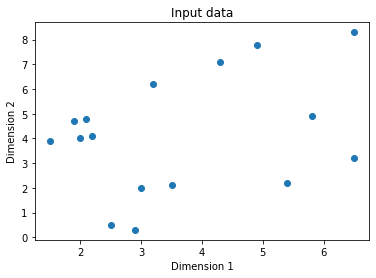

In [11]:
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [12]:
dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()

In [13]:
nn_output_layer = labels.shape[1]

In [14]:
nn_output_layer

2

In [15]:
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
neural_net = nl.net.newp([dim1, dim2], nn_output_layer)

In [16]:
error = neural_net.train(data, labels, epochs = 200, show = 20, lr = 0.01)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
Epoch: 120; Error: 4.0;
Epoch: 140; Error: 4.0;
Epoch: 160; Error: 4.0;
Epoch: 180; Error: 4.0;
Epoch: 200; Error: 4.0;
The maximum number of train epochs is reached


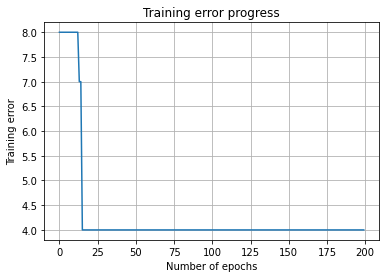

In [17]:
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()
plt.show()

In [18]:
print('\nTest results:')

data_test = [[1.5, 3.2], [3.6, 1.7], [3.6, 5.7], [1.6, 3.9]] 

for item in data_test:
    print(item, '-->', neural_net.sim([item])[0])


Test results:
[1.5, 3.2] --> [1. 0.]
[3.6, 1.7] --> [1. 0.]
[3.6, 5.7] --> [1. 1.]
[1.6, 3.9] --> [1. 0.]


In [19]:
#çok katmanlı sinir ağı

In [20]:
#y = 2X^2 + 8

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [28]:
min_val = -30
max_val = 30
num_points = 160
x = np.linspace(min_val, max_val, num_points)
y = 2 * np.square(x) + 8
y /= np.linalg.norm(y)

In [29]:
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

Text(0.5, 1.0, 'Data-points')

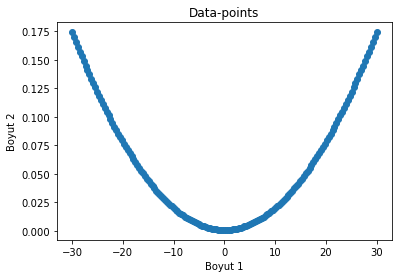

In [30]:
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Boyut 1')
plt.ylabel('Boyut 2')
plt.title('Data-points')

In [31]:
neural_net = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [32]:
neural_net.trainf = nl.train.train_gd

In [33]:
error = neural_net.train(data, labels, epochs = 1000, show = 100, goal = 0.01)

Epoch: 100; Error: 1.3225500922043452;
Epoch: 200; Error: 0.0804101894063199;
Epoch: 300; Error: 0.06657911655959231;
Epoch: 400; Error: 0.052168945692292884;
Epoch: 500; Error: 0.05119766581049383;
Epoch: 600; Error: 0.048149674274398896;
Epoch: 700; Error: 0.04621031945680464;
Epoch: 800; Error: 0.04415909368189445;
Epoch: 900; Error: 0.0422306832320065;
Epoch: 1000; Error: 0.04043563922233932;
The maximum number of train epochs is reached


In [34]:
output = neural_net.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Training error progress')

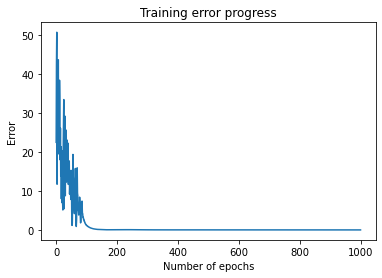

In [35]:
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

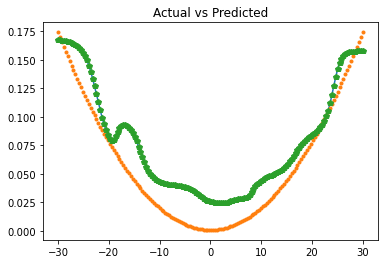

In [40]:
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = neural_net.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs Predicted')
plt.show()

Text(0.5, 1.0, 'Sigmoid Fonksiyonu')

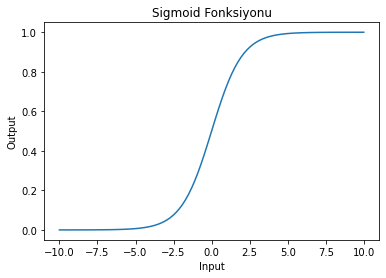

In [41]:
import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 100)

def sigmoid(X):
    val = 1/(1+np.exp(-X))
    return val

output = sigmoid(input)

plt.plot(input, output)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Sigmoid Fonksiyonu")

In [43]:
import numpy as np

input_features = np.array([[1,0,0,1], [1,0,0,0], [0,0,1,1],
                          [0,1,0,0], [1,1,0,0], [0,0,1,1],
                          [0,0,0,1], [0,0,1,0]])

print(input_features)

[[1 0 0 1]
 [1 0 0 0]
 [0 0 1 1]
 [0 1 0 0]
 [1 1 0 0]
 [0 0 1 1]
 [0 0 0 1]
 [0 0 1 0]]


In [44]:
target_output = np.array([[1,1,0,0,1,1,0,0]])
target_output = target_output.reshape(8, 1)
print(target_output.shape)

(8, 1)


In [45]:
target_output

array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [47]:
weights = np.array([[0.1], [0.2], [0.3], [0.4]])
print(weights.shape)
weights

(4, 1)


array([[0.1],
       [0.2],
       [0.3],
       [0.4]])